In [5]:
import numpy as np
import pandas as pd
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion
import matplotlib.pyplot as plt

## Training Results

Text(0.5, 1.0, 'Loss Graph at learning rate = 8e-5')

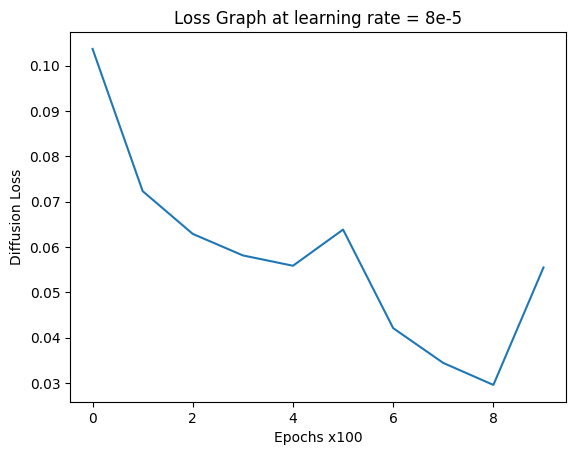

In [14]:
history = np.load('model_1K_8e-5/history.npy')
plt.plot(history)
plt.xlabel('Epochs x100')
plt.ylabel('Diffusion Loss')
plt.title('Loss Graph at learning rate = 8e-5')

In [15]:
print('Min loss: ', min(history))

Min loss:  0.029574260115623474


- Training for 1000 epochs at a learning rate of 8e-5 proved to be unstable, possibly due to high learning rate as the loss graph proceeds erratically. 
- Hence, the next model was trained for longer using a lower learning rate. 

Text(0.5, 1.0, 'Loss Graph at learning rate = 4e-5')

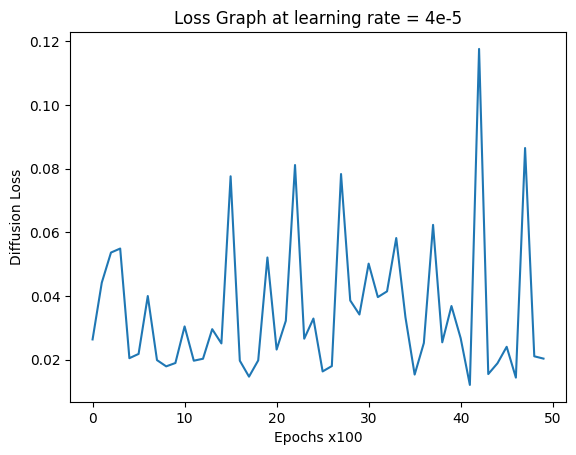

In [16]:
import os
model_path = 'model_5K_4e-5'
history = []
for file in os.listdir(model_path):
    if file.endswith('pt'):
        var = torch.load(os.path.join(model_path, file))
        history.append(var['loss'].detach().numpy())
# history = np.load('model_5K_4e-5/history.npy')
plt.plot(history)
plt.xlabel('Epochs x100')
plt.ylabel('Diffusion Loss')
plt.title('Loss Graph at learning rate = 4e-5')

In [17]:
print('Min loss: ', min(history))

Min loss:  0.012089336


- The longer training time resulted in an even more inconsistent training loss graph. 
- It is suspected that longer training epochs lead to unstable training of the UNet model using DDPM paradigm.

Text(0.5, 1.0, 'Loss Graph at learning rate = 8e-6')

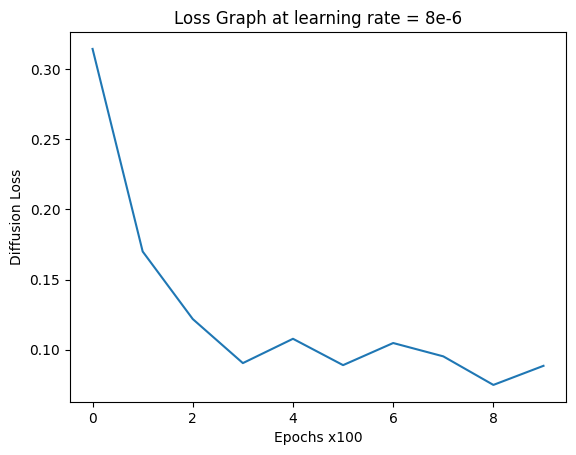

In [18]:
history = np.load('model_1K_8e-6/history.npy')
plt.plot(history)
plt.xlabel('Epochs x100')
plt.ylabel('Diffusion Loss')
plt.title('Loss Graph at learning rate = 8e-6')

In [19]:
print('Min loss: ', min(history))

Min loss:  0.07492539286613464


- Training the model at a lower learning rate and low epochs is more promising than the other two trained models. 
- It shows significantly better results with a smooth decreasing training loss.
- Even though the net loss is higher than the other trained models, the loss graph of training is much better than the other two training loops. 

## Inferences and Conclusions
(refer to generated GIFs for conclusions)

- The DDPM paradigm can be successfully be used to generate 2D motion from a given motion sample. 
- The results of training are coherent with the findings published in SinMDM regarding the problems of global attention for motion generation. 
- The motion generated by the UNet and Gaussian Diffusion model has fair resemblance to the actual motion sample given. 
- The generated motion samples also differ from each other such that they can be distinguished by a human observer. 

### Closing Remarks

- Interestingly, all three training loss graphs have a significant dip in loss value after about 80% of the training is complete. It could be attributed to the beta values and the scheduler characteristics.
- While the SinMDM paper implements the 2D motion matrix as key points in vertical direction and frames in the horizontal direction, I believe rotation of the 2D matrix should not make any significant difference to the training and generated samples since rotation is a common transformation applied to images to perform data augmentation. 
- Using 2 channels in the sampled data to represent the motion was important as the Unets capture spatial features by using skip connections. 